### Импорт необходимых библиотек

In [1]:
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

### Определение функции, генерация данных и добавление шума в них

In [2]:
def linear_func(x, a, b, c):
    return x**a - x**b + b + c

def func_exp(x, a, b, c):
    return a*np.exp(b*x)+c

def generate_data(func, *args, jitter=0):
    xs = np.linspace(1, 200, 200)
    y_s = func(xs, *args)
    noise = jitter * np.random.normal(size=len(xs)) + jitter
    xs = xs.reshape(-1, 1)
    ys = (y_s + noise).reshape(-1, 1)
    return xs, ys, y_s

In [3]:
n_samples = 300

In [4]:
x_n, y_n, y_s = generate_data(linear_func, 0, 0.2, +50, jitter=0.02)
x = np.array(x_n).reshape(-1, 1)
y = np.array(y_n).reshape(-1, 1)
print(len(x_n), len(x))

200 200


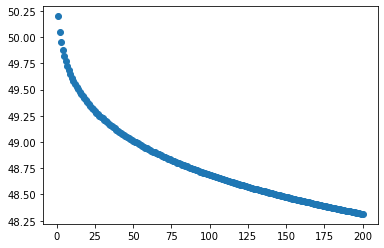

In [5]:
plt.scatter(x, y_s)
plt.savefig('Without noise.jpg', dpi=300)

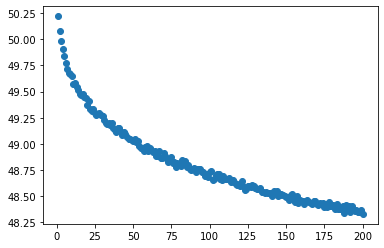

In [6]:
plt.scatter(x, y)
plt.savefig('With noise.jpg', dpi=300)

In [7]:
print(min(y))

[48.32935047]


In [8]:
x_fit = np.arange(x.min(), x.max(), 1)[:, np.newaxis]

### Линейная регрессия

In [9]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x, y)
y_lin_fit = lin_reg.predict(x_fit)
linear_r2 = r2_score(y, lin_reg.predict(x))

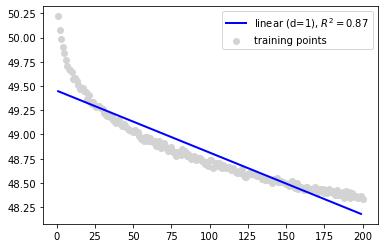

In [10]:
plt.scatter(x, y, label='training points', color='lightgray')
plt.plot(x_fit, y_lin_fit,
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2),
         color='blue',
         lw=2,
         linestyle='-')
plt.legend(loc='upper right')
plt.savefig('1.jpg', dpi=300)

### Полиномиальная 2 степени

In [11]:
quadratic = PolynomialFeatures(degree=2)
x_quad = quadratic.fit_transform(x)
lin_reg = lin_reg.fit(x_quad, y)
y_quad_fit = lin_reg.predict(quadratic.fit_transform(x_fit))
quadratic_r2 = r2_score(y, lin_reg.predict(x_quad))

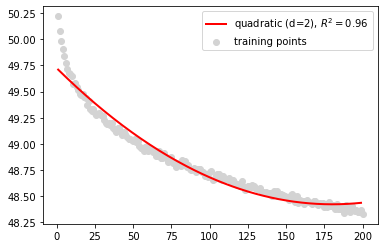

In [12]:
plt.scatter(x, y, label='training points', color='lightgray')
plt.plot(x_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         linestyle='-',
         lw=2)
plt.legend(loc='upper right')
plt.savefig('2.jpg', dpi=300)

### Полиномиальная регрессия 3 степени

In [13]:
cubic = PolynomialFeatures(degree=3)
x_cubic = cubic.fit_transform(x)
lin_reg = lin_reg.fit(x_cubic, y)
y_cubic_fit = lin_reg.predict(cubic.fit_transform(x_fit))
cubic_r2 = r2_score(y, lin_reg.predict(x_cubic))

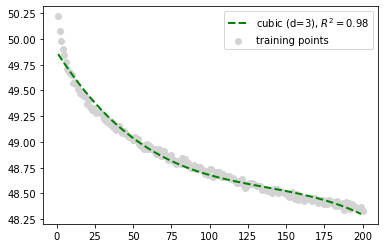

In [14]:
plt.scatter(x, y, label='training points', color='lightgray')
plt.plot(x_fit, y_cubic_fit,
        label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
        color='green',
        linestyle='--',
        lw=2)
plt.legend(loc='upper right')
plt.savefig('3.jpg', dpi=300)

### Полиномиальная регрессия 4 степени

In [15]:
deg_4 = PolynomialFeatures(degree=4)
x_4 = deg_4.fit_transform(x)
lin_reg = lin_reg.fit(x_4, y)
y_4_fit = lin_reg.predict(deg_4.fit_transform(x_fit))
deg_4_r2 = r2_score(y, lin_reg.predict(x_4))

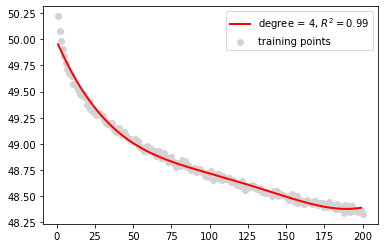

In [16]:
plt.scatter(x, y, label='training points', color='lightgray')
plt.plot(x_fit, y_4_fit,
         label='degree = 4, $R^2={:.2f}$'.format(deg_4_r2),
         color='red',
         linestyle='-',
         lw=2)
plt.legend(loc='upper right')
plt.savefig('4.jpg', dpi=300)

### Полиномиальная регрессия 5 степени

In [17]:
deg_5 = PolynomialFeatures(degree=5)
x_5 = deg_5.fit_transform(x)
lin_reg = lin_reg.fit(x_5, y)
y_5_fit = lin_reg.predict(deg_5.fit_transform(x_fit))
deg_5_r2 = r2_score(y, lin_reg.predict(x_5))

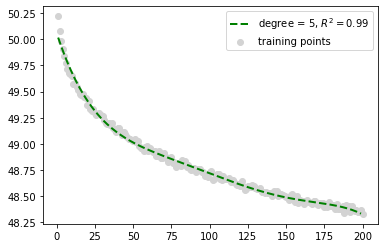

In [18]:
plt.scatter(x, y, label='training points', color='lightgray')
plt.plot(x_fit, y_5_fit,
        label='degree = 5, $R^2={:.2f}$'.format(deg_5_r2),
        color='green',
        linestyle='--',
        lw=2)
plt.legend(loc='upper right')
plt.savefig('5.jpg', dpi=300)

### Экспонента

In [19]:
transformer = FunctionTransformer(np.log, validate=True)
y_trans = transformer.fit_transform(y)
regressor = LinearRegression()
results = regressor.fit(x, y_trans)
y_fit = results.predict(x)
exp_r2 = r2_score(y, np.exp(results.predict(x)))

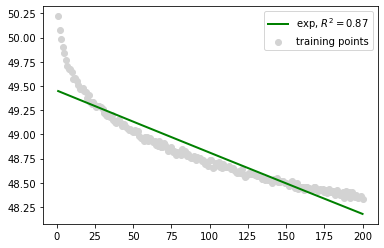

In [20]:
plt.scatter(x, y, label='training points', color='lightgray')
plt.plot(x, np.exp(y_fit),
        label='exp, $R^2={:.2f}$'.format(exp_r2),
        color='green',
        linestyle='-',
        lw=2)
plt.legend(loc='upper right')
plt.savefig('6.jpg', dpi=300)

### Результаты

In [21]:
print('Полученные результаты:\n',
      'Коэффициент детерминации для линейной регрессии: {:.5f}\n'.format(linear_r2),
      'Коэффициент детерминации для полиномиальной регрессии 2 степени: {:.5f}\n'.format(quadratic_r2),
      'Коэффициент детерминации для полиномиальной регрессии 3 степени: {:.5f}\n'.format(cubic_r2),
      'Коэффициент детерминации для полиномиальной регрессии 4 степени: {:.5f}\n'.format(deg_4_r2),
      'Коэффициент детерминации для полиномиальной регрессии 5 степени: {:.5f}\n'.format(deg_5_r2),
      'Коэффициент детерминации для регрессии с экспонентой: {:.5f}'.format(exp_r2))

Полученные результаты:
 Коэффициент детерминации для линейной регрессии: 0.87239
 Коэффициент детерминации для полиномиальной регрессии 2 степени: 0.96379
 Коэффициент детерминации для полиномиальной регрессии 3 степени: 0.98369
 Коэффициент детерминации для полиномиальной регрессии 4 степени: 0.99113
 Коэффициент детерминации для полиномиальной регрессии 5 степени: 0.99409
 Коэффициент детерминации для регрессии с экспонентой: 0.87427


In [22]:
best_result = max(linear_r2, quadratic_r2, cubic_r2, deg_4_r2, deg_5_r2, exp_r2)
print('')
if best_result == linear_r2:
    print('Наилучший результат показала линейная функция, R^2={}'.format(linear_r2))
elif best_result == quadratic_r2:
    print('Наилучший результат показала полиномиальная функция второй степени, R^2={}'.format(quadratic_r2))
elif best_result == cubic_r2:
    print('Наилучший результат показала полиномиальная функция третьей степени, R^2={}'.format(cubic_r2))
elif best_result == deg_4_r2:
    print('Наилучший результат показала полиномиальная функция четвертой степени, R^2={}'.format(deg_4_r2))
elif best_result == deg_5_r2:
    print('Наилучший результат показала полиномиальная функция пятой степени, R^2={}'.format(deg_5_r2))
elif best_result == exp_r2:
    print('Наилучший результат показала экспоненциальная функция, R^2={}'.format(exp_r2))


Наилучший результат показала полиномиальная функция пятой степени, R^2=0.9940873871982613
